Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

Loading the CSV File

In [2]:
data=pd.read_csv("D:\Python_rnw\one\Data-PreProcessing & Feature Engineering\PR2\patient_health_records.csv")

In [3]:
data_raw=pd.read_csv("D:\Python_rnw\one\Data-PreProcessing & Feature Engineering\PR2\patient_health_records.csv")

About Data

In [4]:
data.head()

age  gender   bmi  blood_pressure  cholesterol  glucose region smoker  \
0   69  Female  17.5            94.0          NaN    137.0   East    Yes   
1   32    Male  28.6            96.0        162.0    148.0    NaN     No   
2   89  Female  30.3           125.0        194.0      NaN   West     No   
3   78    Male  22.3            82.0        214.0    114.0  North     No   
4   38    Male  22.2           138.0        213.0      NaN    NaN     No   

   disease  
0        0  
1        1  
2        1  
3        1  
4        0

In [5]:
data.tail()

age  gender   bmi  blood_pressure  cholesterol  glucose region smoker  \
1495   31     NaN  26.8           135.0        159.0     92.0  South    Yes   
1496   29    Male  21.9           141.0        186.0    123.0    NaN     No   
1497   29    Male  33.1           111.0        201.0     58.0   West    Yes   
1498   30  Female   NaN           102.0        251.0     73.0  North     No   
1499   42    Male   NaN             NaN        456.0    115.0   West     No   

      disease  
1495        1  
1496        1  
1497        1  
1498        1  
1499        0

In [6]:
data.shape

(1500, 9)

In [7]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1500 non-null   int64  
 1   gender          1275 non-null   str    
 2   bmi             1275 non-null   float64
 3   blood_pressure  1275 non-null   float64
 4   cholesterol     1275 non-null   float64
 5   glucose         1275 non-null   float64
 6   region          1275 non-null   str    
 7   smoker          1500 non-null   str    
 8   disease         1500 non-null   int64  
dtypes: float64(4), int64(2), str(3)
memory usage: 105.6 KB


In [8]:
data.describe()

age          bmi  blood_pressure  cholesterol      glucose  \
count  1500.000000  1275.000000     1275.000000  1275.000000  1275.000000   
mean     52.870667    26.303747      118.989804   205.567059   111.000000   
std      20.857228     8.355044       17.617844    54.506312    51.817985   
min      18.000000     7.100000       63.000000    99.000000   -10.000000   
25%      34.000000    21.100000      108.000000   176.000000    85.000000   
50%      53.000000    25.600000      119.000000   199.000000   105.000000   
75%      71.000000    30.000000      130.500000   226.000000   128.000000   
max      89.000000    72.702865      178.000000   546.000000   532.000000   

           disease  
count  1500.000000  
mean      0.385333  
std       0.486836  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

Part A:- Handling Missing Values

Missing Value Analysis % per colunm

In [9]:
#help identify missing values in each column
mv= data_raw.isnull().sum()
mp = (mv/len(data))*100

ms =  pd.DataFrame({
    "Missing Value": mv,
    "Missing Percentage(%)": mp.round(2)
})
ms

Missing Value  Missing Percentage(%)
age                         0                    0.0
gender                    225                   15.0
bmi                       225                   15.0
blood_pressure            225                   15.0
cholesterol               225                   15.0
glucose                   225                   15.0
region                    225                   15.0
smoker                      0                    0.0
disease                     0                    0.0

Imputation Technique

In [10]:
data.isnull().sum()

age                 0
gender            225
bmi               225
blood_pressure    225
cholesterol       225
glucose           225
region            225
smoker              0
disease             0
dtype: int64

Replace Missing BMI with MEAN

In [11]:
bmi_imputer = SimpleImputer(strategy='mean')
data[['bmi']] = bmi_imputer.fit_transform(data[['bmi']])
data[['bmi']]

bmi
0     17.500000
1     28.600000
2     30.300000
3     22.300000
4     22.200000
...         ...
1495  26.800000
1496  21.900000
1497  33.100000
1498  26.303747
1499  26.303747

[1500 rows x 1 columns]

In [12]:
data.isnull().sum()

age                 0
gender            225
bmi                 0
blood_pressure    225
cholesterol       225
glucose           225
region            225
smoker              0
disease             0
dtype: int64

Replace Missing Region with Most Frequent value

In [13]:
region_imputer = SimpleImputer(strategy='most_frequent')
data[['region']] = region_imputer.fit_transform(data[['region']])
data[['region']] 

region
0      East
1      West
2      West
3     North
4      West
...     ...
1495  South
1496   West
1497   West
1498  North
1499   West

[1500 rows x 1 columns]

In [14]:
data.isnull().sum()

age                 0
gender            225
bmi                 0
blood_pressure    225
cholesterol       225
glucose           225
region              0
smoker              0
disease             0
dtype: int64

In [15]:
data['region'].isnull().sum()
data['region'].value_counts()

region
West     550
South    323
East     315
North    312
Name: count, dtype: int64

Replace Gender with the most common category

In [16]:
gender_imputer = SimpleImputer(strategy='most_frequent')
data[['gender']] = gender_imputer.fit_transform(data[['gender']])
data[['gender']]

gender
0     Female
1       Male
2     Female
3       Male
4       Male
...      ...
1495  Female
1496    Male
1497    Male
1498  Female
1499    Male

[1500 rows x 1 columns]

In [17]:
data.isnull().sum()

age                 0
gender              0
bmi                 0
blood_pressure    225
cholesterol       225
glucose           225
region              0
smoker              0
disease             0
dtype: int64

In [18]:
data['gender'].isnull().sum()
data['gender'].value_counts()

gender
Female    898
Male      602
Name: count, dtype: int64

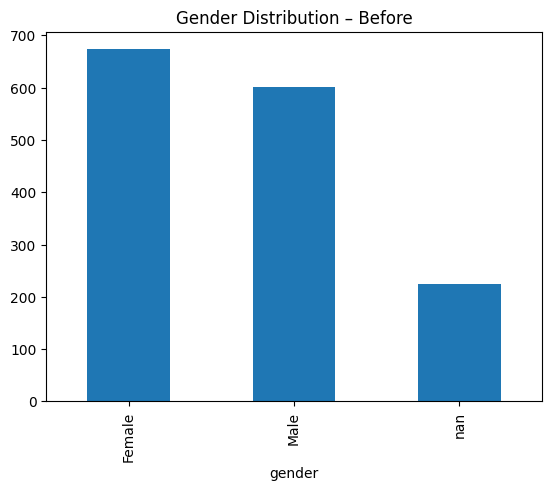

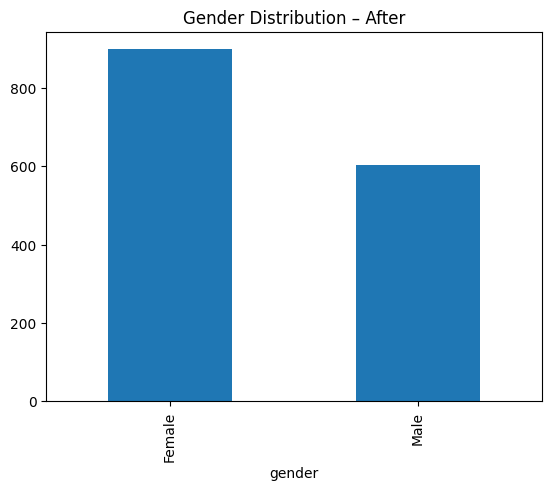

In [19]:
data_raw['gender'].value_counts(dropna=False).plot(kind='bar')
plt.title("Gender Distribution – Before")
plt.show()

data['gender'].value_counts().plot(kind='bar')
plt.title("Gender Distribution – After")
plt.show()

The first bar chart (“Before”) shows the gender distribution including any missing values (NaN) in the dataset. The second chart (“After”) shows the cleaned data with missing values handled, reflecting only the valid gender entries. This ensures accurate representation of the dataset for analysis without distortion from missing data.

KNN Imputation

In [20]:
num_cols = ['age', 'bmi', 'blood_pressure', 'cholesterol', 'glucose']
knn_imputer = KNNImputer(
    n_neighbors=5,      # standard choice
    weights='uniform'   # can also be 'distance'
)
data[num_cols] = knn_imputer.fit_transform(data[num_cols])


In [21]:
data[num_cols].isnull().sum()

age               0
bmi               0
blood_pressure    0
cholesterol       0
glucose           0
dtype: int64

MICE Imputation

In [22]:
mice = IterativeImputer(random_state=42)

data[num_cols] = mice.fit_transform(data[num_cols])


In [23]:
data.isnull().sum()

age               0
gender            0
bmi               0
blood_pressure    0
cholesterol       0
glucose           0
region            0
smoker            0
disease           0
dtype: int64

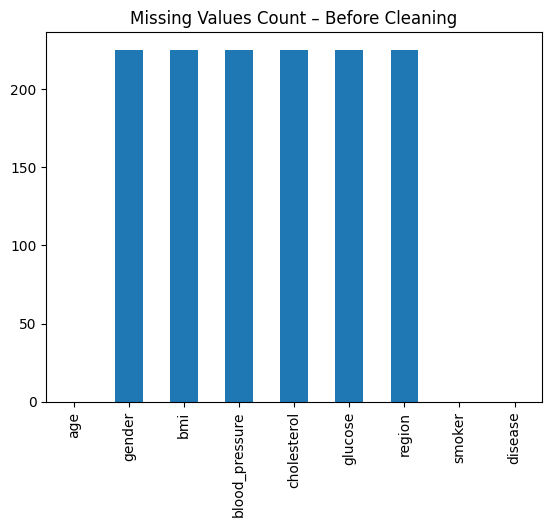

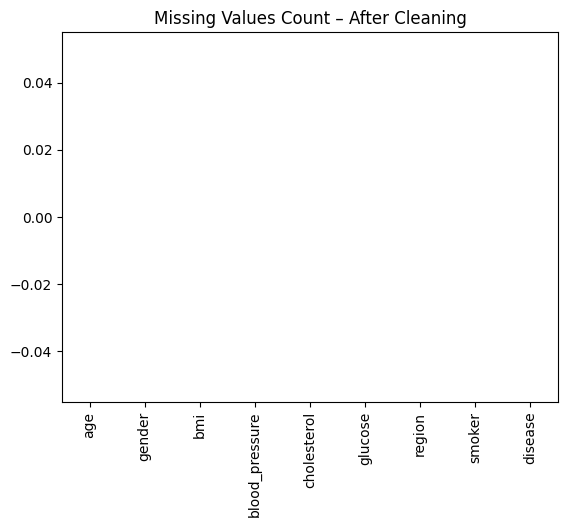

In [24]:
data_raw.isnull().sum().plot(kind='bar')
plt.title("Missing Values Count – Before Cleaning")
plt.show()
data.isnull().sum().plot(kind='bar')
plt.title("Missing Values Count – After Cleaning")
plt.show()

The first bar chart (“Before Cleaning”) shows that several columns in the dataset contain missing values, which could affect analysis and modeling. The second chart (“After Cleaning”) shows that missing values have been handled—either imputed or removed—resulting in a clean dataset ready for reliable analysis.

Part 2:- Handling Outliers


In [25]:
num_cols = ['age', 'bmi', 'blood_pressure', 'cholesterol', 'glucose']

def count_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).sum()

outlier_counts = {}

for col in num_cols:
    outlier_counts[col] = count_outliers_iqr(data[col])

outlier_counts
outlier_df = pd.DataFrame.from_dict(
    outlier_counts,
    orient='index',
    columns=['Outlier_Count']
)

outlier_df


Outlier_Count
age                         0
bmi                        71
blood_pressure             30
cholesterol                62
glucose                    48

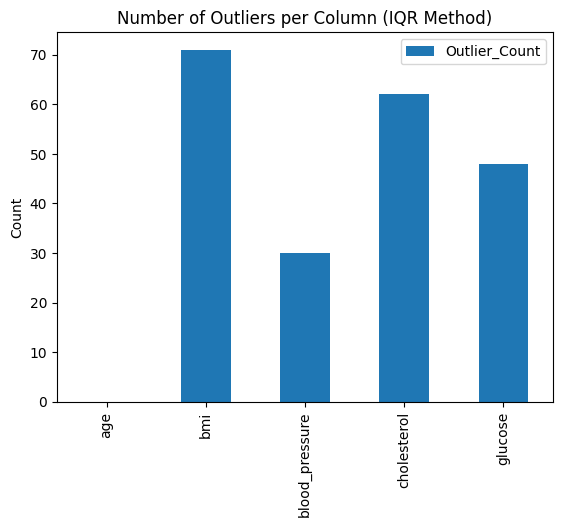

In [26]:
outlier_df.plot(kind='bar')
plt.title("Number of Outliers per Column (IQR Method)")
plt.ylabel("Count")
plt.show()


The bar chart shows the number of outliers detected in each column using the IQR method. Columns with higher counts have more extreme values that could distort analysis, highlighting the need for outlier treatment like Winsorization, clipping, or transformation to make the data more robust.

Before handling outlinear

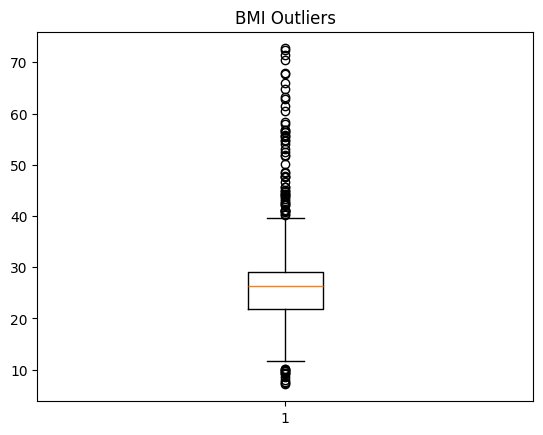

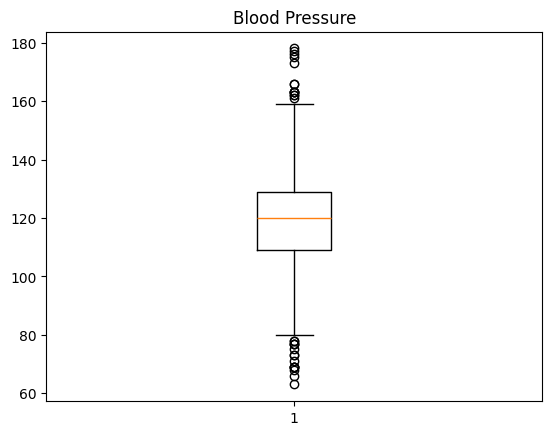

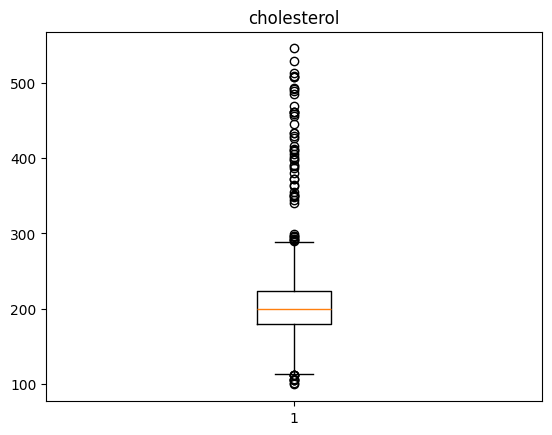

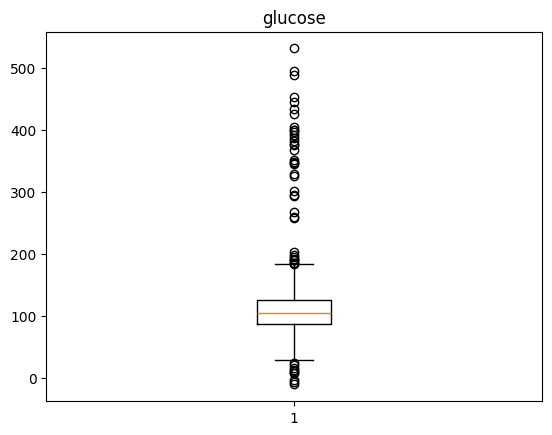

In [27]:
plt.boxplot(data['bmi'])
plt.title("BMI Outliers")
plt.show()

plt.boxplot(data['blood_pressure'])
plt.title("Blood Pressure")
plt.show()

plt.boxplot(data['cholesterol'])
plt.title("cholesterol")
plt.show()

plt.boxplot(data['glucose'])
plt.title("glucose")
plt.show()

As we can see that These columns has some outlinears so we will remove  them using methods like IQR, Winsorization and Zscore.
These Method can help us remove outlinear and help us normal our data.

Numerical Columns-

In [28]:
num_cols = ['age', 'bmi', 'blood_pressure', 'cholesterol', 'glucose']

Z-Score

In [29]:
from scipy.stats import zscore

df_z = data.copy()

z_vals = df_z[['cholesterol', 'glucose']].apply(zscore)

df_z = df_z[(z_vals.abs() <= 3).all(axis=1)]
df_z

age  gender        bmi  blood_pressure  cholesterol  glucose region  \
0     69.0  Female  17.500000            94.0        188.4    137.0   East   
1     32.0    Male  28.600000            96.0        162.0    148.0   West   
2     89.0  Female  30.300000           125.0        194.0    104.8   West   
3     78.0    Male  22.300000            82.0        214.0    114.0  North   
4     38.0    Male  22.200000           138.0        213.0    105.4   West   
...    ...     ...        ...             ...          ...      ...    ...   
1494  77.0  Female  24.200000           163.0        191.0     93.0   West   
1495  31.0  Female  26.800000           135.0        159.0     92.0  South   
1496  29.0    Male  21.900000           141.0        186.0    123.0   West   
1497  29.0    Male  33.100000           111.0        201.0     58.0   West   
1498  30.0  Female  26.303747           102.0        251.0     73.0  North   

     smoker  disease  
0       Yes        0  
1        No        1  
2        No        1  
3        No        1  
4        No        0  
...     ...      ...  
1494    Yes        1  
1495    Yes        1  
1496     No        1  
1497    Yes        1  
1498     No        1  

[1434 rows x 9 columns]

 Z-Score-Before After

Cholesterol-

In [30]:
z_before = np.abs(zscore(data['cholesterol']))

before_count = (z_before > 3).sum()
before_count

z_after = np.abs(zscore(df_z['cholesterol']))

after_count = (z_after > 3).sum()
after_count


pd.DataFrame({
    'Stage': ['Before Z-score', 'After Z-score'],
    'Cholesterol Outliers': [before_count, after_count]
})


Stage  Cholesterol Outliers
0  Before Z-score                    37
1   After Z-score                     6

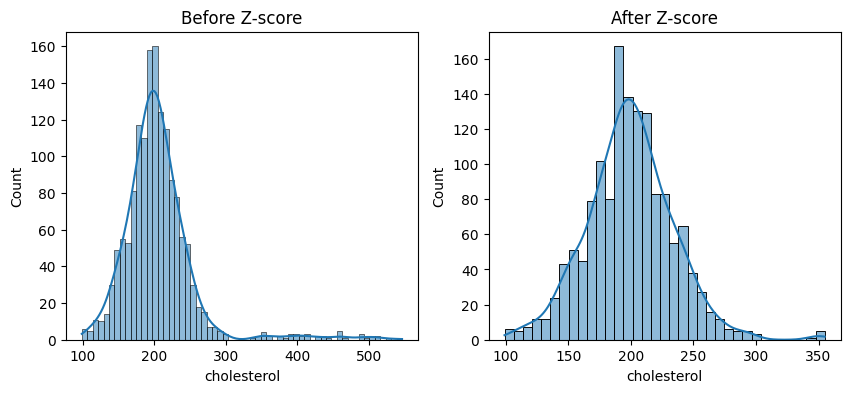

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(data['cholesterol'], kde=True)
plt.title("Before Z-score")

plt.subplot(1,2,2)
sns.histplot(df_z['cholesterol'], kde=True)
plt.title("After Z-score")

plt.show()


The “Before Z-score” histogram shows that cholesterol values are widely spread with some extreme values, Z-score help reduce the influence of extreme values and standardizing the data for analysis or modeling.

Glucose-

In [32]:
z_before = np.abs(zscore(data['glucose']))

before_count = (z_before > 3).sum()
before_count

z_after = np.abs(zscore(df_z['glucose']))

after_count = (z_after > 3).sum()
after_count


pd.DataFrame({
    'Stage': ['Before Z-score', 'After Z-score'],
    'Glucose Outliers': [before_count, after_count]
})


Stage  Glucose Outliers
0  Before Z-score                29
1   After Z-score                10

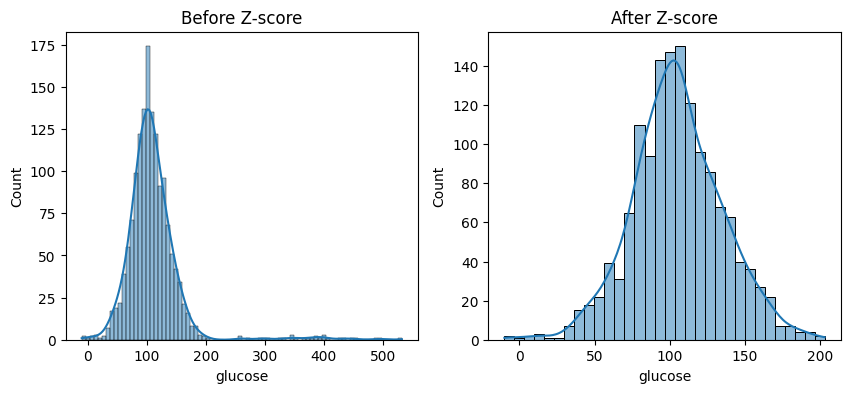

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(data['glucose'], kde=True)
plt.title("Before Z-score")

plt.subplot(1,2,2)
sns.histplot(df_z['glucose'], kde=True)
plt.title("After Z-score")

plt.show()


The histogram “Before Z-score” shows that the glucose values are spread unevenly with some extreme values, indicating the presence of outliers. After applying Z-score normalization (“After Z-score”), effect of extreme values reduced, making the data standardized for further analysis or modeling.

IQR Method

In [34]:
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


In [36]:
df_iqr = data.copy()

df_iqr['bmi'] = np.clip(df_iqr['bmi'], lower, upper)


In [39]:
before_bmi = ((data['bmi'] < lower) | (data['bmi'] > upper)).sum()
before_bmi
after_bmi = ((df_iqr['bmi'] < lower) | (df_iqr['bmi'] > upper)).sum()
after_bmi
pd.DataFrame({
    'Stage': ['Before IQR', 'After IQR'],
    'BMI Outliers': [before_bmi, after_bmi]
})


Stage  BMI Outliers
0  Before IQR            71
1   After IQR             0

QUANTILE RANGE

In [40]:
print("Q1 is:- ",Q1)
print("Q3 is:- ",Q3)

Q1 is:-  21.9
Q3 is:-  29.025


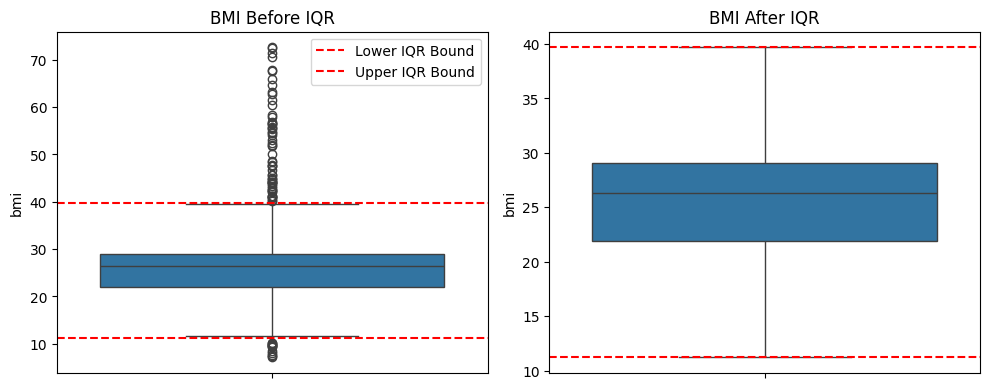

In [41]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.boxplot(y=data['bmi'])
plt.axhline(lower, color='red', linestyle='--', label='Lower IQR Bound')
plt.axhline(upper, color='red', linestyle='--', label='Upper IQR Bound')
plt.title("BMI Before IQR")
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(y=df_iqr['bmi'])
plt.axhline(lower, color='red', linestyle='--')
plt.axhline(upper, color='red', linestyle='--')
plt.title("BMI After IQR")

plt.tight_layout()
plt.show()


The boxplots show BMI values before and after IQR-based outlier treatment. Extreme values present before cleaning are capped at the IQR boundaries, resulting in the absence of outliers after treatment while preserving the dataset size.

PERCENTILE METHOD

In [42]:
lower_p = data['bmi'].quantile(0.01)
upper_p = data['bmi'].quantile(0.99)

lower_p, upper_p


(11.799000000000001, 56.74733206163737)

In [43]:
df_pct = data.copy()
df_pct['bmi'] = np.clip(df_pct['bmi'], lower_p, upper_p)

Before-After of Percentile

In [44]:
before_pct = ((data['bmi'] < lower_p) | (data['bmi'] > upper_p)).sum()
before_pct

after_pct = ((df_pct['bmi'] < lower_p) | (df_pct['bmi'] > upper_p)).sum()
after_pct

pd.DataFrame({
    'Stage': ['Before Percentile', 'After Percentile'],
    'BMI Outliers': [before_pct, after_pct]
})


Stage  BMI Outliers
0  Before Percentile            30
1   After Percentile             0

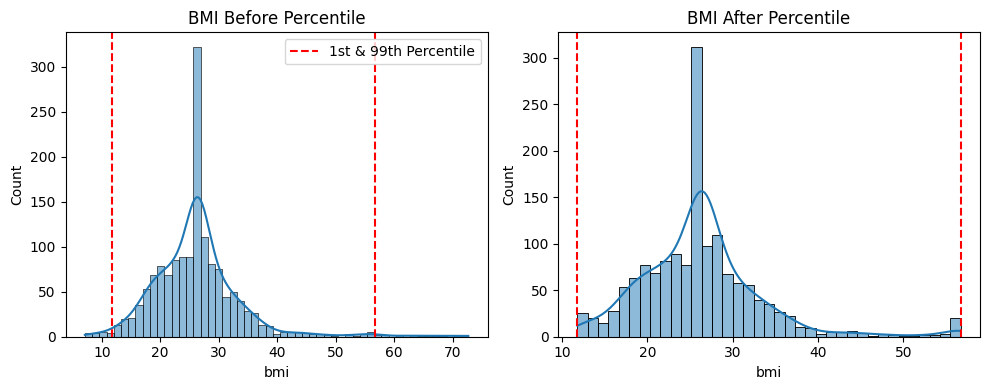

In [45]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(data['bmi'], kde=True)
plt.axvline(lower_p, color='red', linestyle='--', label='1st & 99th Percentile')
plt.axvline(upper_p, color='red', linestyle='--')
plt.title("BMI Before Percentile")
plt.legend()

plt.subplot(1,2,2)
sns.histplot(df_pct['bmi'], kde=True)
plt.axvline(lower_p, color='red', linestyle='--')
plt.axvline(upper_p, color='red', linestyle='--')
plt.title("BMI After Percentile")

plt.tight_layout()
plt.show()


The percentile method was applied to the BMI variable using the 1st and 99th percentile thresholds. Extreme values outside these bounds were capped. After treatment, no observations lay beyond the percentile limits, indicating successful handling of extreme values while preserving all records.

Winsorization

Winsorization was applied using the 1st and 99th percentile limits. Extreme BMI values were capped while preserving all observations.

In [55]:
data_win = data.copy()
num_cols = ['bmi', 'glucose', 'blood_pressure', 'cholesterol']

# Apply Winsorization at 5th and 95th percentile
for col in num_cols:
    lower = data[col].quantile(0.05)
    upper = data[col].quantile(0.95)
    data_win[col] = np.clip(data[col], lower, upper)


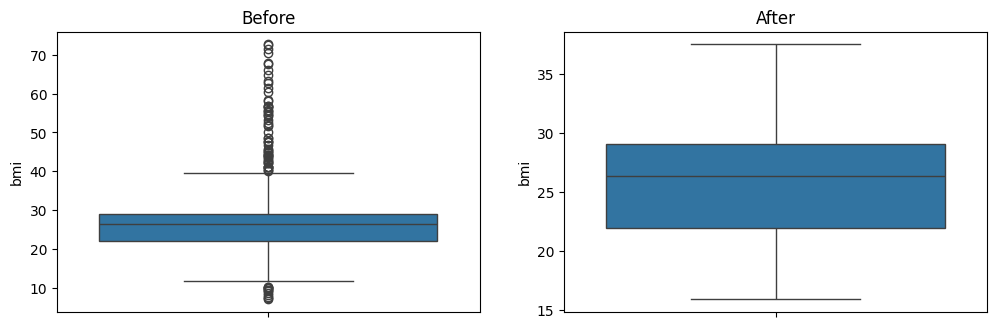

In [54]:
# Plot before vs after
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(data["bmi"])
plt.title("Before")

plt.subplot(2,2,2)
sns.boxplot(data_win["bmi"])
plt.title("After")
plt.show()


The “Before” boxplot shows that the bmi column has several extreme values (outliers) beyond the whiskers, which could distort analysis. The “After” boxplot shows that Winsorization has capped these extremes, reducing the impact of outliers and making the distribution more compact, while preserving most of the original data.

After Handling Outliers

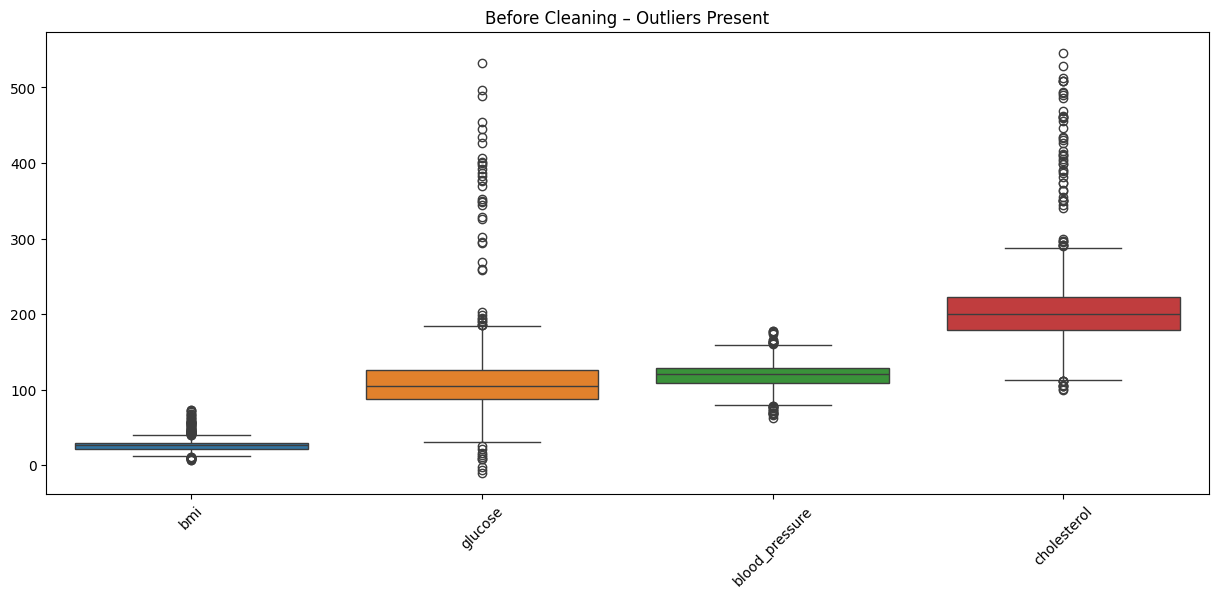

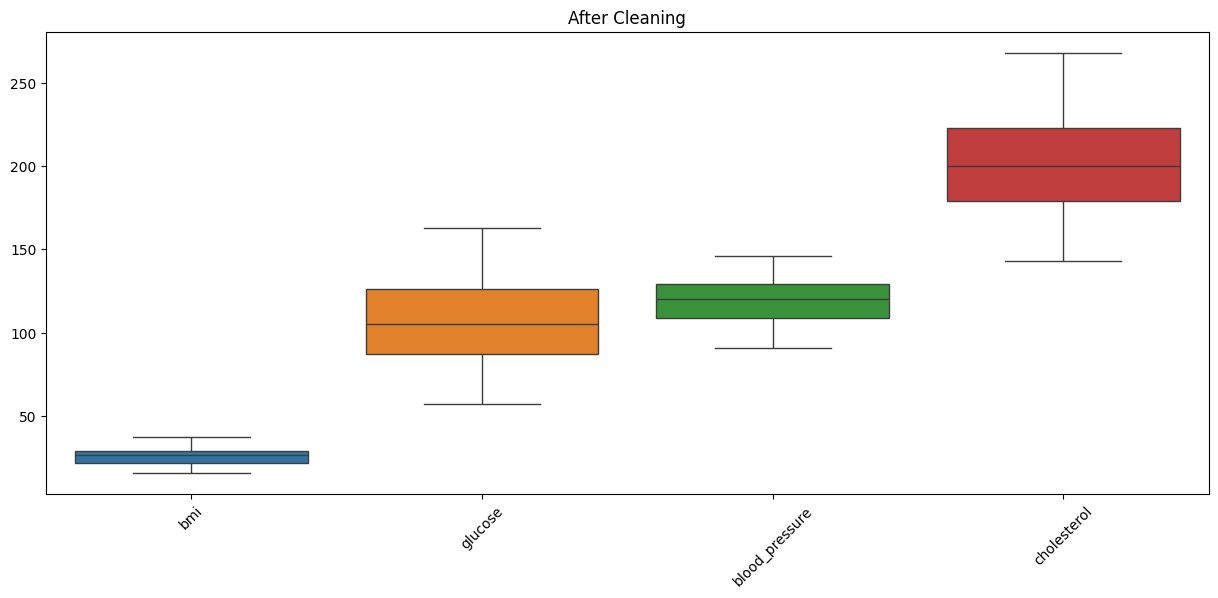

In [57]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=data[num_cols])
plt.title("Before Cleaning – Outliers Present")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(data=data_win[num_cols])
plt.title("After Cleaning")
plt.xticks(rotation=45)
plt.show()

The first boxplot (“Before Cleaning – Outliers Present”) shows that all numeric columns (bmi, glucose, blood_pressure, cholesterol) contain extreme values, as indicated by points beyond the whiskers. These outliers can skew statistical analysis and affect model performance.

The second boxplot (“After Cleaning”) demonstrates that Winsorization has capped the extreme values at the chosen percentile thresholds. The distributions now appear more compact, with reduced effect of outliers, making the data more robust for further analysis.

PART C- Final Clean dataset

In [58]:
final_df = data.copy()

No missing values

In [59]:
final_df.isnull().sum()


age               0
gender            0
bmi               0
blood_pressure    0
cholesterol       0
glucose           0
region            0
smoker            0
disease           0
dtype: int64

No extreme outliers

Text(0.5, 1.0, 'After')

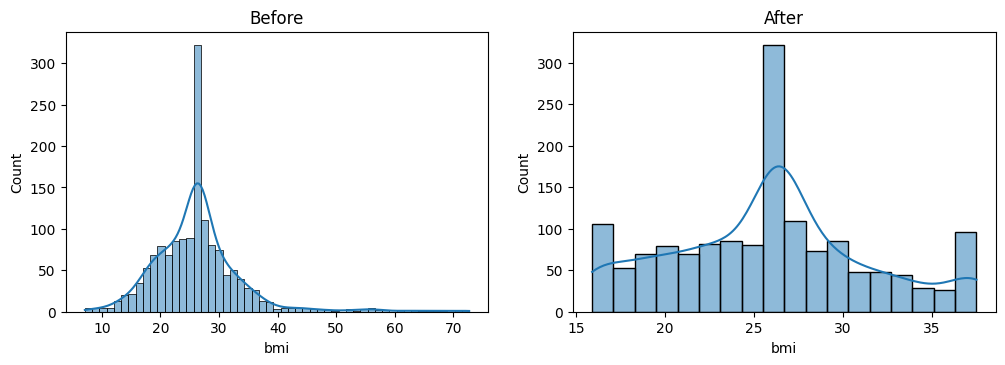

In [60]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.histplot(data["bmi"],kde=True)
plt.title("Before")

plt.subplot(2,2,2)
sns.histplot(data_win["bmi"],kde=True)
plt.title("After")

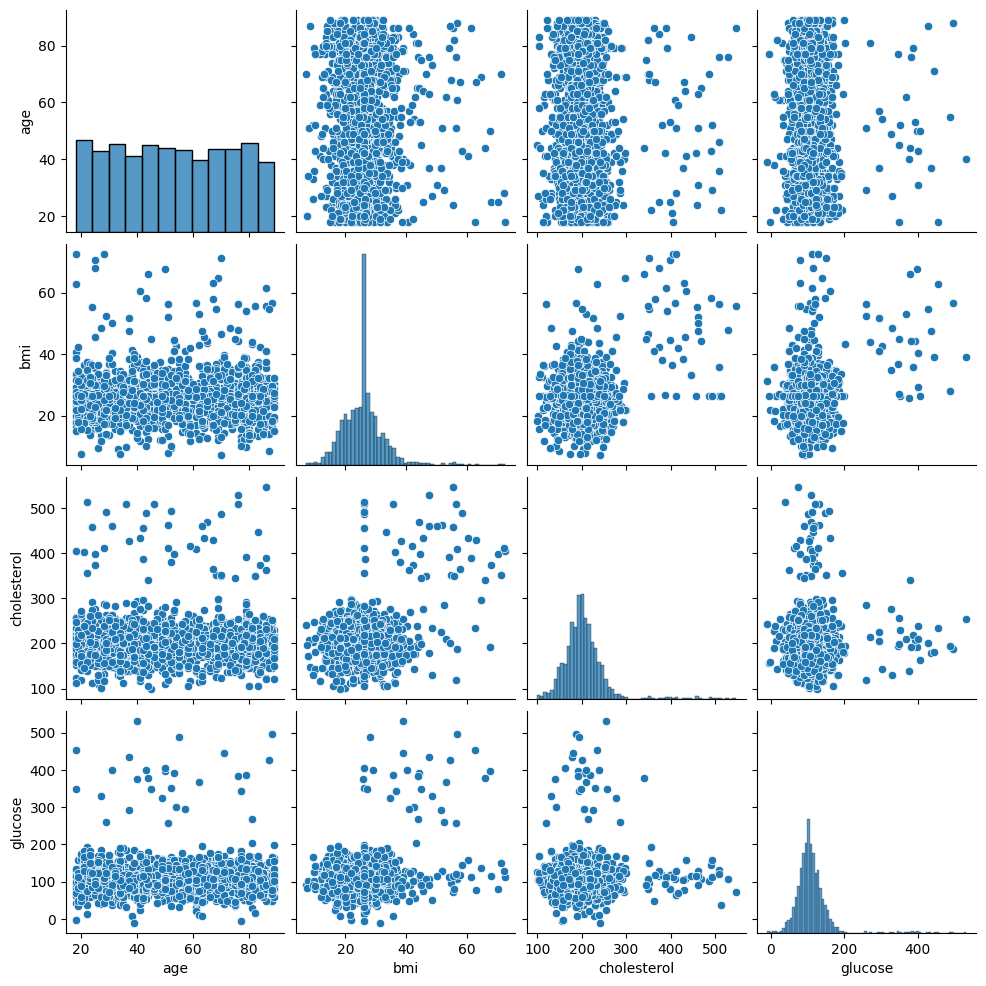

In [61]:
sns.pairplot(data[["age","bmi","cholesterol","glucose"]])

In [62]:
data.describe()

age          bmi  blood_pressure  cholesterol      glucose  \
count  1500.000000  1500.000000     1500.000000  1500.000000  1500.000000   
mean     52.870667    26.303747      119.228933   205.502667   110.316667   
std      20.857228     7.702516       16.524298    51.303816    48.557119   
min      18.000000     7.100000       63.000000    99.000000   -10.000000   
25%      34.000000    21.900000      109.000000   179.000000    87.000000   
50%      53.000000    26.303747      120.000000   200.000000   105.000000   
75%      71.000000    29.025000      129.000000   223.000000   126.000000   
max      89.000000    72.702865      178.000000   546.000000   532.000000   

           disease  
count  1500.000000  
mean      0.385333  
std       0.486836  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [3]:
from ydata_profiling import ProfileReport
import pandas as pd

df = pd.read_csv("D:\Python_rnw\one\Data-PreProcessing & Feature Engineering\PR2\patient_health_records_1000.csv")

profile = ProfileReport(
    df,
    title="Patient Health Records - Profiling Report",
    explorative=True
)

profile


Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.58s/it]


SUMMARY REPORT


The final dataset was prepared by addressing both missing values and outliers using appropriate data preprocessing techniques. Missing numerical values were imputed using statistical measures such as mean, while categorical variables were imputed using the most frequent category. Advanced methods such as KNN and MICE were also explored to ensure robust imputation.

For outlier handling, different methods were evaluated. Z-score was applied to normally distributed variables such as glucose and cholesterol, while Winsorization was used for BMI due to its robustness against skewed medical data. Winsorization preserved all observations while limiting the influence of extreme values.

Overall, the applied data cleaning techniques improved dataset consistency, reduced noise caused by extreme values, and ensured the dataset is suitable for further analysis and machine learning tasks without information loss.